In [133]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import Counter
import random

In [21]:
#business.json path
#150K businesses
businessses_path = "C:/Users/anton/source/data/Datasets/yelp_dataset/yelp_academic_dataset_business.json"

### Histogram of cities

In [49]:
businesses = []
with open(businessses_path, 'r', encoding='utf-8') as file:
    for line in file:
        business = json.loads(line)
        businesses.append(business)
        #filters:
        #if business['city'] == '':
            #businesses.append(business)

In [56]:
#sample entry:
businesses[0]

{'business_id': 'MTSW4McQd7CbVtyjqoe9mw',
 'name': 'St Honore Pastries',
 'address': '935 Race St',
 'city': 'Philadelphia',
 'state': 'PA',
 'postal_code': '19107',
 'latitude': 39.9555052,
 'longitude': -75.1555641,
 'stars': 4.0,
 'review_count': 80,
 'is_open': 1,
 'attributes': {'RestaurantsDelivery': 'False',
  'OutdoorSeating': 'False',
  'BusinessAcceptsCreditCards': 'False',
  'BusinessParking': "{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}",
  'BikeParking': 'True',
  'RestaurantsPriceRange2': '1',
  'RestaurantsTakeOut': 'True',
  'ByAppointmentOnly': 'False',
  'WiFi': "u'free'",
  'Alcohol': "u'none'",
  'Caters': 'True'},
 'categories': 'Restaurants, Food, Bubble Tea, Coffee & Tea, Bakeries',
 'hours': {'Monday': '7:0-20:0',
  'Tuesday': '7:0-20:0',
  'Wednesday': '7:0-20:0',
  'Thursday': '7:0-20:0',
  'Friday': '7:0-21:0',
  'Saturday': '7:0-21:0',
  'Sunday': '7:0-21:0'}}

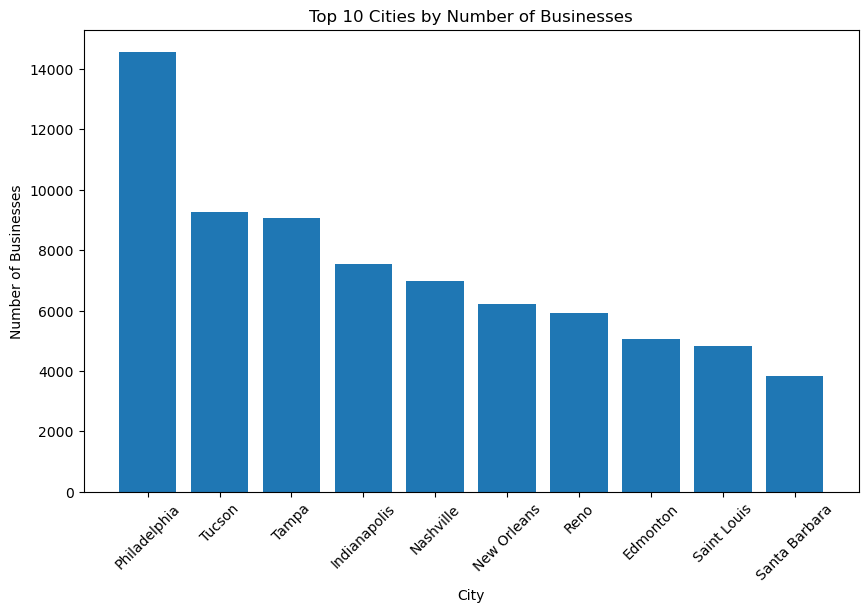

In [53]:
# Extract the city names from each business
cities = [business['city'] for business in businesses]

# Count the occurrences of each city
city_counts = Counter(cities)
top_cities = city_counts.most_common(10)
# Unzip the city names and counts for plotting
cities, counts = zip(*top_cities)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.bar(cities, counts)
plt.xlabel('City')
plt.ylabel('Number of Businesses')
plt.title('Top 10 Cities by Number of Businesses')
plt.xticks(rotation=45)
plt.show()

# Philadelphia only (most businesses)
Phili has 14.5 K businesses,


In [125]:
city = 'Philadelphia'
min_reviews = 50
#min number of category counts
min_cat_count = 5

In [126]:
businesses = []
with open(businessses_path, 'r', encoding='utf-8') as file:
    for line in file:
        business = json.loads(line)
        
        #filters:
        if business['city'] == city \
        and business['review_count'] >= min_reviews \
        and 'Restaurants' in business['categories'].split(',') \
        and len(business['categories'].split(',')) >= min_cat_count:
        
            businesses.append(business)

In [312]:
len(businesses)

256

In [313]:
#distribution of category counts (number of category tags)
cat_lengths = [len(business['categories'].split(',')) for business in businesses]
cat_length_counts = Counter(cat_lengths)
cat_length_counts

Counter({5: 87, 6: 70, 7: 47, 8: 20, 9: 14, 10: 7, 11: 5, 12: 3, 13: 2, 16: 1})

In [314]:
#take random 100 item sample
random.seed(42)
businesses_100 = [businesses[i] for i in random.sample(range(len(businesses)),100)]

In [315]:
#write category only 100 business sample
businesses_cats = {}
for i, business in enumerate(businesses_100):
    cats = business['categories']
    name = business['name']
    description = f' name: {name} \n categories: {cats}'
    businesses_cats[i] = {'description':description}

In [316]:
with open('data/yelp_cat_100.json', 'w') as json_file:
    json.dump(businesses_cats, json_file, indent=4)

In [317]:
businesses_cats[0]['description']

" name: Zuzu's Kitchen \n categories: Restaurants, Pizza, Salad, Sandwiches, Food Delivery Services, Food"

In [319]:
businesses_cats_atts = {}
for i, business in enumerate(businesses_100):
    name = f' name: {business["name"]} \n'
    cats = ' categories: ' + business['categories'] + ' \n'
    atts = ' attributes:\n '

    # Process each attribute
    for att, value in business['attributes'].items():
        # Check if value is a dictionary and format accordingly
        if isinstance(value, dict):
            atts += f'    {att}:\n'
            for sub_att, sub_value in value.items():
                atts += f'        {sub_att}: {sub_value} \n'
        else:
            # Directly add other types of values (e.g., numeric, boolean, string)
            atts += f'    {att}: {value} \n'

    description = name + cats + atts
    businesses_cats_atts[i] = {'description': description}


In [320]:
with open('data/yelp_cat_att_100.json', 'w') as json_file:
    json.dump(businesses_cats_atts, json_file, indent=4)

In [321]:
print(businesses_cats_atts[0]['description'])

 name: Zuzu's Kitchen 
 categories: Restaurants, Pizza, Salad, Sandwiches, Food Delivery Services, Food 
 attributes:
     RestaurantsGoodForGroups: False 
    RestaurantsAttire: 'casual' 
    RestaurantsTakeOut: True 
    Alcohol: u'none' 
    BusinessAcceptsCreditCards: True 
    BikeParking: True 
    RestaurantsTableService: False 
    RestaurantsDelivery: True 
    HasTV: True 
    RestaurantsPriceRange2: 1 
    GoodForKids: True 
    NoiseLevel: u'quiet' 
    GoodForMeal: {'dessert': None, 'latenight': None, 'lunch': True, 'dinner': True, 'brunch': None, 'breakfast': False} 
    WiFi: 'no' 
    RestaurantsReservations: False 
    BusinessParking: {'garage': None, 'street': None, 'validated': None, 'lot': False, 'valet': False} 
    OutdoorSeating: False 
    Caters: True 
    Ambience: {'touristy': False, 'hipster': False, 'romantic': False, 'divey': None, 'intimate': None, 'trendy': None, 'upscale': False, 'classy': False, 'casual': True} 



# FS Sample

In [322]:
random.seed(42)
fs_set = set(range(len(businesses))) - set(random.sample(range(len(businesses)),100))

In [323]:
fs_set_25 = random.sample(fs_set,25)
businesses_fs_25 = [businesses[i] for i in fs_set_25]

C:\Users\anton\AppData\Local\Temp\ipykernel_33076\3872261984.py:1: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  fs_set_25 = random.sample(fs_set,25)


In [324]:
businesses_cats_atts_fs = {}
for i, business in enumerate(businesses_fs_25):
    name = f' name: {business["name"]} \n'
    cats = ' categories: ' + business['categories'] + ' \n'
    atts = ' attributes:\n '

    # Process each attribute
    for att, value in business['attributes'].items():
        # Check if value is a dictionary and format accordingly
        if isinstance(value, dict):
            atts += f'    {att}:\n'
            for sub_att, sub_value in value.items():
                atts += f'        {sub_att}: {sub_value} \n'
        else:
            # Directly add other types of values (e.g., numeric, boolean, string)
            atts += f'    {att}: {value} \n'

    description = name  + cats + atts
    businesses_cats_atts_fs[i] = {'description': description}


In [325]:
with open('data/yelp_cat_att_fs_25.json', 'w') as json_file:
    json.dump(businesses_cats_atts_fs, json_file, indent=4)